# Traveling Salesman Lösungen

### Universität der Bundeswehr München - Prof. Dr. Claudius Steinhardt - Logistics Analytics
Erstellt von Sebastian Knall am 09.06.2022

Dieses Notebook stellt die Divide and Conquer Lösung des TS-Problems grafisch dar.

In [1]:
import math
import random
import matplotlib.pyplot as plt
%matplotlib notebook


class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        return math.hypot(self.x - city.x, self.y - city.y)

    def __repr__(self):
        return f"({self.x}, {self.y})"


def read_cities(size):
    cities = []
    with open(f'test_data/cities_{size}.data', 'r') as handle:
        lines = handle.readlines()
        for line in lines:
            x, y = map(float, line.split())
            cities.append(City(x, y))
    return cities


def write_cities_and_return_them(size):
    cities = generate_cities(size)
    with open(f'test_data/cities_{size}.data', 'w+') as handle:
        for city in cities:
            handle.write(f'{city.x} {city.y}\n')
    return cities


def generate_cities(size):
    return [City(x=int(random.random() * 1000), y=int(random.random() * 1000)) for _ in range(size)]


def path_cost(route):
    return sum([city.distance(route[index - 1]) for index, city in enumerate(route)])


<IPython.core.display.Javascript object>


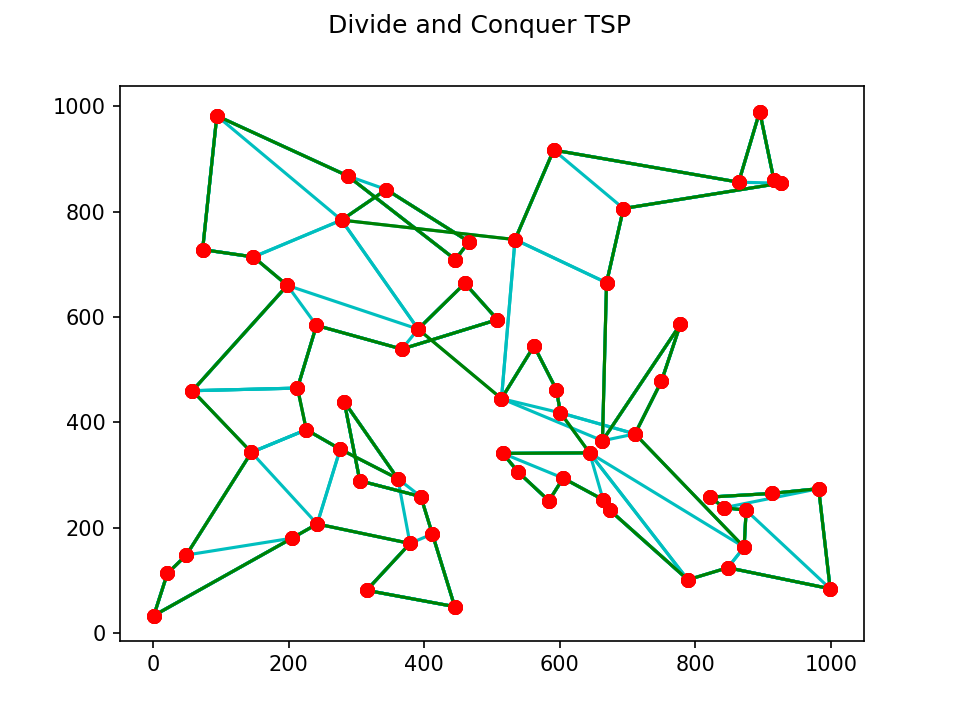

[82.46211251235322, 251.44581921360316, 44.82186966202994, 217.3499482401595, 45.803929962395145, 62.20128616033595, 141.90842117365693, 101.78899744078433, 133.64505228402587, 141.89080308462562, 109.62207806824318, 73.00684899377592, 94.86832980505139, 151.75308893067051, 166.00301202086666, 145.8012345626744, 80.06247560499237, 244.13111231467406, 122.24974437601085, 133.79461872586654, 151.71354586852158, 111.04053313993049, 84.0535543567314, 73.59347797189639, 76.29547824084989, 254.86663179004034, 87.8635305459552, 224.15396494374127, 224.85995641732214, 157.11460785044784, 39.446165846632034, 180.42449944505873, 258.6600085053737, 47.853944456021594, 70.2922470831599, 42.720018726587654, 71.84705978674423, 128.00390619039717, 175.06855799943062, 22.360679774997898, 63.32456079595026, 156.20819440733575, 70.06425622241343, 32.38826948140329, 190.7590102721232, 29.73213749463701, 92.26592003551474, 69.58448102845921, 87.32124598286491, 268.6000744601535, 44.40720662234904, 110.923

In [2]:
class DivideConquer:
    def __init__(self, cities):
        self.cities = cities
        self.route = []

    def run(self):
        plt.ion()
        plt.show()
        self.route = self.solve(self.cities)
        print([edge[0].distance(edge[1]) for edge in self.route])
        return sum([edge[0].distance(edge[1]) for edge in self.route])

    def solve(self, cities):
        if len(cities) < 1:
            raise Exception('recursing on cities length < 0')
        elif len(cities) == 1:
            return cities[0]
        elif len(cities) == 2:
            return [(cities[0], cities[1])]
        else:
            half_1, half_2 = self.split_longer_dim(cities)
            graph_1 = self.solve(half_1)
            graph_2 = self.solve(half_2)
            merge = self.merge(graph_1, graph_2)

            x = []
            y = []
            fig = plt.figure(0)
            fig.suptitle('Divide and Conquer TSP')
            for c1, c2 in merge:
                x.append(c1.x)
                x.append(c2.x)
                y.append(c1.y)
                y.append(c2.y)
                plt.plot([c1.x, c2.x], [c1.y, c2.y], 'c')

            plt.plot(x, y, 'ro')
            fig.canvas.draw()
            plt.pause(0.1)
            return merge

    @staticmethod
    def split_longer_dim(cities):
        cities_by_x = sorted(cities, key=lambda city: city.x)
        cities_by_y = sorted(cities, key=lambda city: city.y)
        middle_length = len(cities_by_x) // 2
        if abs(cities_by_x[0].x - cities_by_x[-1].x) > abs(cities_by_y[0].y - cities_by_y[-1].y):
            return cities_by_x[:middle_length], cities_by_x[middle_length:]
        else:
            return cities_by_y[:middle_length], cities_by_y[middle_length:]

    def merge(self, graph_1, graph_2):
        if isinstance(graph_1, City):
            graph_2.append((graph_1, graph_2[0][0]))
            graph_2.append((graph_1, graph_2[0][1]))
            return graph_2
        min_cost = math.inf
        for edge_1_index, (city_00, city_01) in enumerate(graph_1):
            for edge_2_index, (city_10, city_11) in enumerate(graph_2):
                cost = city_00.distance(city_10) + city_01.distance(city_11) - \
                       city_00.distance(city_01) - city_01.distance(city_10)
                cost2 = city_00.distance(city_11) + city_01.distance(city_10) - \
                        city_00.distance(city_01) - city_01.distance(city_10)
                if cost < min_cost:
                    min_cost = cost
                    min_edge_1 = (city_00, city_10)
                    min_edge_2 = (city_01, city_11)
                    old_edge_1_index = edge_1_index
                    old_edge_2_index = edge_2_index
                if cost2 < min_cost:
                    min_cost = cost2
                    min_edge_1 = (city_00, city_11)
                    min_edge_2 = (city_01, city_10)
                    old_edge_1_index = edge_1_index
                    old_edge_2_index = edge_2_index
        if len(graph_1) + len(graph_2) > 4:
            del graph_1[old_edge_1_index]
            del graph_2[old_edge_2_index]
        elif len(graph_1) + len(graph_2) == 4:
            del graph_2[old_edge_2_index]
        graph_1.extend([min_edge_1, min_edge_2])
        graph_1.extend(graph_2)
        return graph_1


if __name__ == "__main__":
    for _ in range(1):
        cities = read_cities(64)
        divideConquer = DivideConquer(cities)
        print(divideConquer.run())
        x = []
        y = []
        fig = plt.figure(0)
        fig.suptitle('Divide and Conquer TSP')
        for c1, c2 in divideConquer.route:
            x.append(c1.x)
            x.append(c2.x)
            y.append(c1.y)
            y.append(c2.y)
            plt.plot([c1.x, c2.x], [c1.y, c2.y], 'g')

        plt.plot(x, y, 'ro')
        plt.show(block=True)
